In [27]:
# step 1: Import python libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, roc_curve, precision_recall_curve, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


EDA

In [29]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient died during the follow-up period (boolean)

In [30]:
# update column name `num` to `target`
df = df.rename(columns={'DEATH_EVENT':'target'})
df.head()
df['target'].value_counts(dropna=False)

0    203
1     96
Name: target, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  target                    299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [32]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [33]:
df.shape

(299, 13)

In [34]:
cat_feats = ['anemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'target']
num_feats = df.columns[~df.columns.isin(cat_feats)].to_list()

In [35]:
print(cat_feats)
print(num_feats)

['anemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'target']
['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [36]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: target, Length: 299, dtype: int64

<Axes: xlabel='target', ylabel='count'>

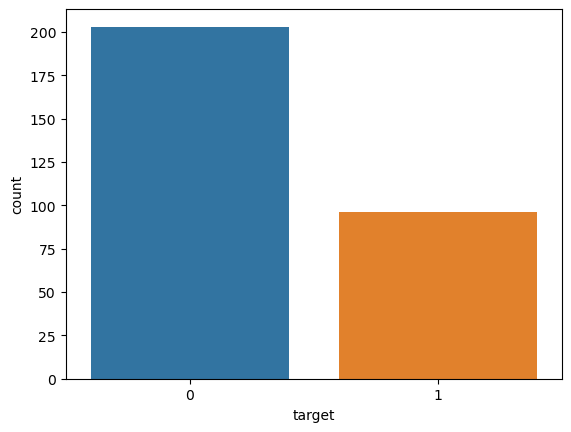

In [37]:
sns.countplot(x=df['target'])

The dataset is imbalance

In [38]:
# Handling missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
target                      0
dtype: int64

Note:
- No missing value

In [39]:
# Handling duplicate
df_duplicated_rows = df.duplicated()
print(df_duplicated_rows.unique())

[False]


Note:
- No dupcated rows
  

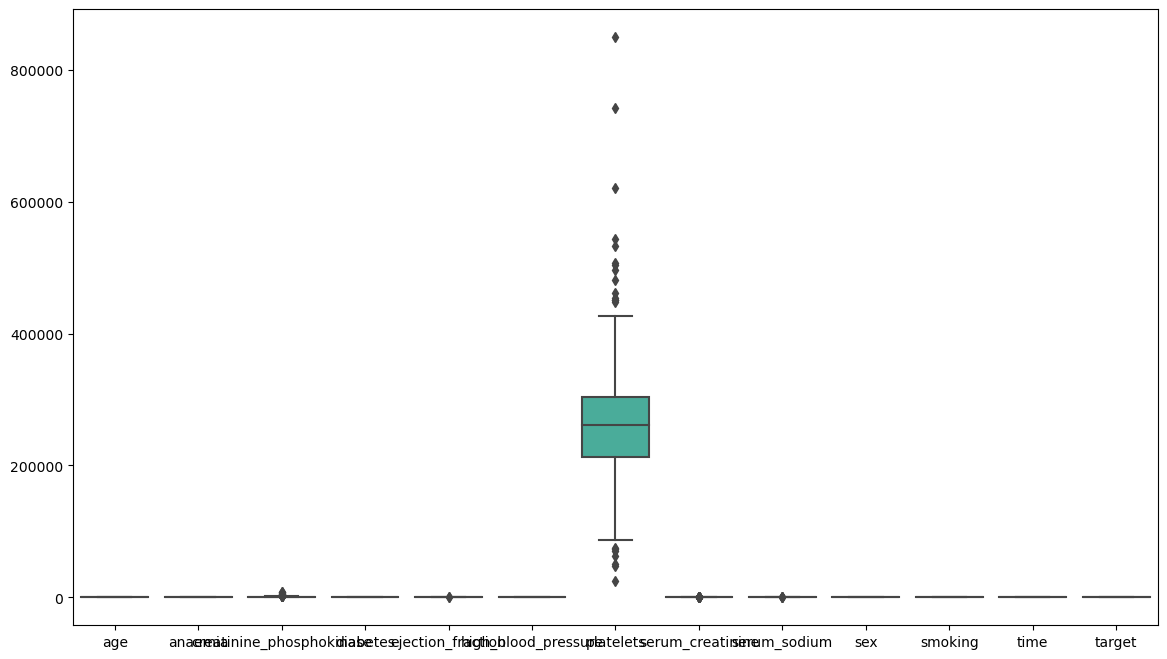

In [40]:
# Handling outliers
plt.figure(figsize=(14, 8))
sns.boxplot(df)
plt.show()

In [41]:
# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in df.columns:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in age: 0
Number of outliers in anaemia: 0
Number of outliers in creatinine_phosphokinase: 29
Number of outliers in diabetes: 0
Number of outliers in ejection_fraction: 2
Number of outliers in high_blood_pressure: 0
Number of outliers in platelets: 21
Number of outliers in serum_creatinine: 29
Number of outliers in serum_sodium: 4
Number of outliers in sex: 0
Number of outliers in smoking: 0
Number of outliers in time: 0
Number of outliers in target: 0


Note:
- There are outliers in palette serum

In [42]:
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

# Handle outliers for each feature
for column in df.columns:
    handle_outliers(df, column)

In [43]:
# Detect and print number of outliers for each feature
for column in df.columns:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in age: 0
Number of outliers in anaemia: 0
Number of outliers in creatinine_phosphokinase: 0
Number of outliers in diabetes: 0
Number of outliers in ejection_fraction: 0
Number of outliers in high_blood_pressure: 0
Number of outliers in platelets: 0
Number of outliers in serum_creatinine: 0
Number of outliers in serum_sodium: 0
Number of outliers in sex: 0
Number of outliers in smoking: 0
Number of outliers in time: 0
Number of outliers in target: 0


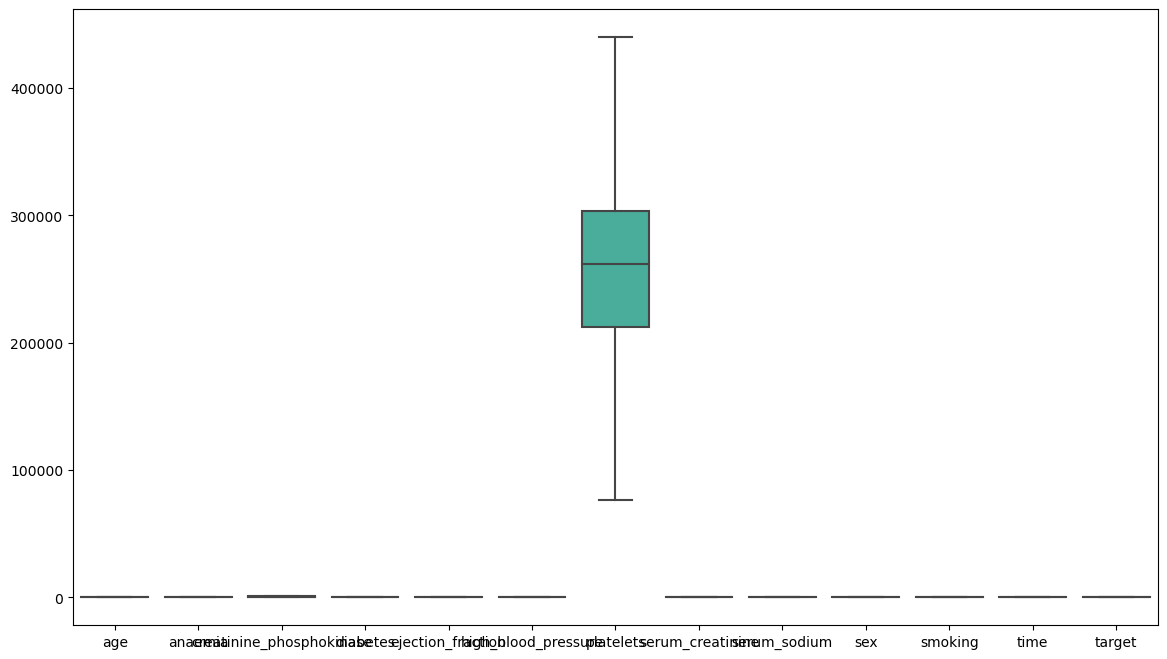

In [44]:
# Handling outliers
plt.figure(figsize=(14, 8))
sns.boxplot(df)
plt.show()

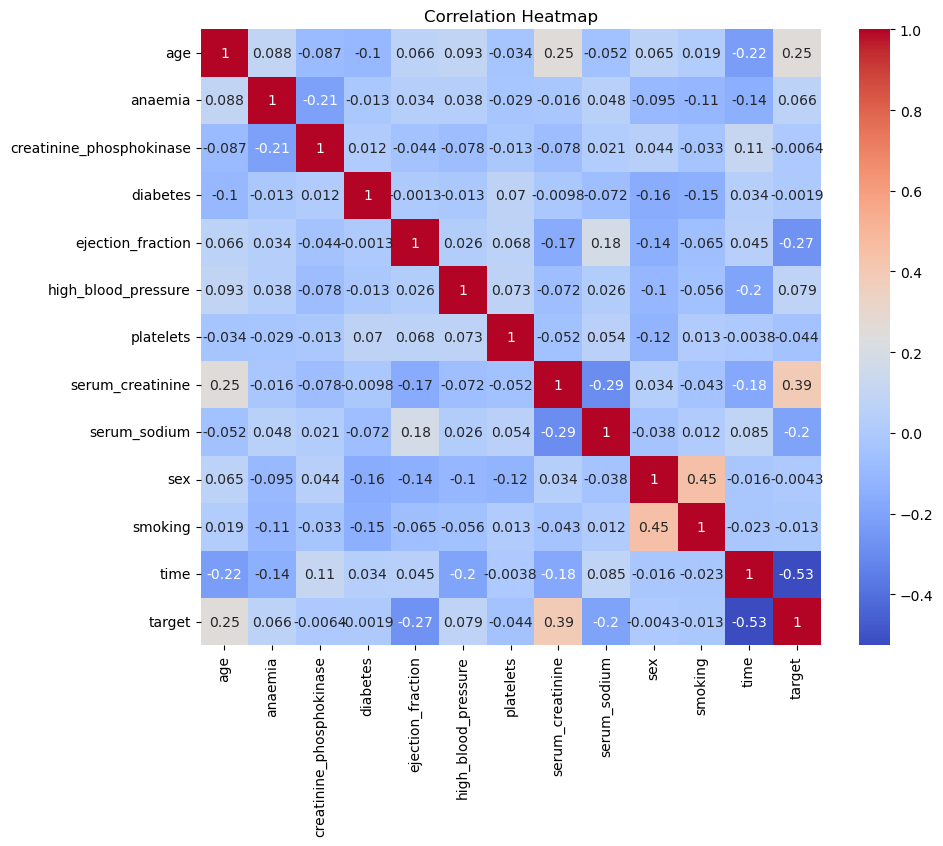

In [45]:
# Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Data Preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_feats]), columns=num_feats)

In [47]:
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                    582.00         0               20.0   
1    55.0        0                   1280.25         0               38.0   
2    65.0        0                    146.00         0               20.0   
3    50.0        1                    111.00         0               20.0   
4    65.0        1                    160.00         1               20.0   
..    ...      ...                       ...       ...                ...   
294  62.0        0                     61.00         1               38.0   
295  55.0        0                   1280.25         0               38.0   
296  45.0        0                   1280.25         1               60.0   
297  45.0        0                   1280.25         0               38.0   
298  50.0        0                    196.00         0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [48]:
print(df_scaled)

          age   anaemia  creatinine_phosphokinase  ejection_fraction  \
0    1.192945 -0.871105                  0.410040          -1.545801   
1   -0.491279 -0.871105                  2.224599          -0.002867   
2    0.350833 -0.871105                 -0.723004          -1.545801   
3   -0.912335  1.147968                 -0.813959          -1.545801   
4    0.350833  1.147968                 -0.686622          -1.545801   
..        ...       ...                       ...                ...   
294  0.098199 -0.871105                 -0.943895          -0.002867   
295 -0.491279 -0.871105                  2.224599          -0.002867   
296 -1.333392 -0.871105                  2.224599           1.882941   
297 -1.333392 -0.871105                  2.224599          -0.002867   
298 -0.912335 -0.871105                 -0.593068           0.597163   

     platelets  serum_creatinine  serum_sodium      time  
0     0.071750          1.514665     -1.649172 -1.629502  
1     0.051564   

In [49]:
df_scaled['target'] = df['target']

In [50]:
df_scaled.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,target
0,1.192945,-0.871105,0.410040,-1.545801,0.071750,1.514665,-1.649172,-1.629502,1
1,-0.491279,-0.871105,2.224599,-0.002867,0.051564,-0.306161,-0.175024,-1.603691,1
2,0.350833,-0.871105,-0.723004,-1.545801,-1.194509,0.149046,-1.894864,-1.590785,1
3,-0.912335,1.147968,-0.813959,-1.545801,-0.604408,1.514665,0.070667,-1.590785,1
4,0.350833,1.147968,-0.686622,-1.545801,0.833964,2.083673,-2.877629,-1.577879,1


In [51]:
df_scaled.shape

(299, 9)

## Part II - KMeans Clustering

In [52]:
# Import Library
from sklearn.cluster import KMeans

# Set the features
X = df_scaled[num_feats]
y = df_scaled['target']

In [53]:
# Split dataset in training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'Outcome ytrain (Without SMOTE)')

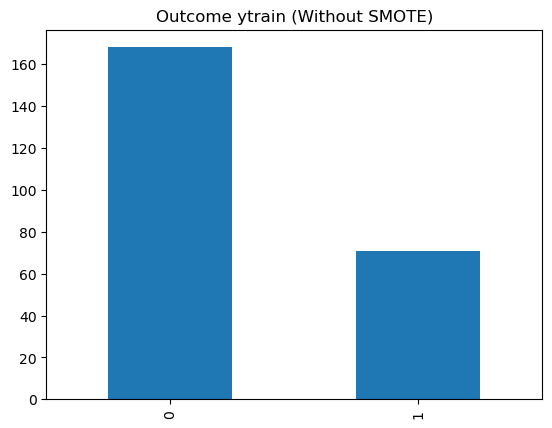

In [54]:
#Split and generate imbalance test/train set
class_nobalance = pd.Series(y_train).value_counts().plot.bar()
class_nobalance.set_title("Outcome ytrain (Without SMOTE)")

Text(0.5, 1.0, 'Outcome ytrain (SMOTE)')

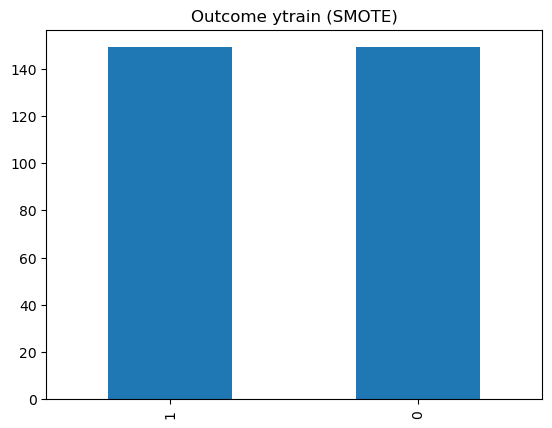

In [61]:
# Handle imbalance dataset using imbalance-learn
#  
# Split and generate balance test/train set using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)
class_balance = pd.Series(y_train).value_counts().plot.bar()
class_balance.set_title("Outcome ytrain (SMOTE)")

In [63]:
# Handling imbalance dataset using resample from sklearn

# from sklearn.utils import resample

# # setting up testing and training sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# # concatenate our training data back together
# df_scaled = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# # Separate majority and minority classes
# df_scaled_majority = df_scaled[df_scaled.target==0]
# df_scaled_minority = df_scaled[df_scaled.target==1]

# # Upsample minority class
# df_scaled_minority_upsampled = resample(df_scaled_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=len(df_scaled_majority),    # to match majority class
#                                  random_state=1234) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_scaled_upsampled = pd.concat([df_scaled_majority, df_scaled_minority_upsampled])
 
# # Display new class counts
# df_scaled_upsampled.target.value_counts()

0    149
1    149
Name: target, dtype: int64

In [64]:
# Define function to find the optimum number of cluster
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [68]:
X = df_scaled[num_feats]

c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmea

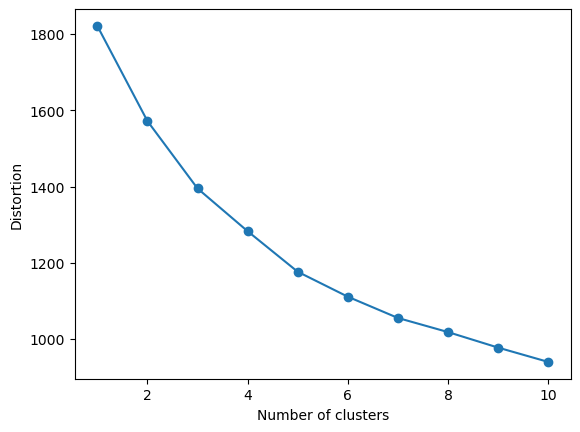

In [69]:
# Plot the chart using elbow rule
plot_distortion(X,max_clusters=10)

In [70]:
# Fit the model

km = KMeans(n_clusters=6, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km_6 = km.fit_predict(X)

# Get cluster labels
cluster_labels = km.labels_

df_scaled['Cluster'] = cluster_labels

print(df_scaled.head())

c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          age   anaemia  creatinine_phosphokinase  ejection_fraction  \
266 -0.491279 -0.871105                  2.013453          -1.545801   
66  -1.586025  1.147968                 -0.452736          -1.974394   
287 -1.333392 -0.871105                  0.410040           1.454349   
272  0.519255 -0.871105                 -0.548889          -0.002867   
145 -0.912335 -0.871105                 -0.621653          -0.688615   

     platelets  serum_creatinine  serum_sodium      time  target  Cluster  
266   0.051564          1.355343     -0.666407  1.429181       1        1  
66   -0.567527          0.149046     -0.175024 -0.842246       1        2  
287   2.223162         -0.533764     -1.157790  1.545334       0        3  
272  -0.542939         -0.078557     -0.912098  1.480805       0        5  
145   0.084044         -1.216574      1.053432 -0.235672       0        3  


In [71]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()